<img src="https://cmse.msu.edu/_cmse/assets/Image/CMSE-bigger.png"
     alt="CMSE Grapical Image"
     align="left" 
     height="82" 
     width="82" />

<br>

## __CMSE  201 - Spring 2019__


## Homework 3: Modeling Population

### More compartmental modeling, first-order differential equations, and plotting


## Goals

### By the end of the homework assignment you will have practiced:

1. Using `odeint`
2. Using `matplotlib`
3. Building compartmental models
4. Interpreting model results

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due roughly two weeks from now at 11:59pm on Friday, February 22th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #3.  Submission instructions can be found at the end of the notebook.

## Grading


* Part 1: Population growth in a 2-compartment model
   - Question 1 (1 point)
   - Question 2 (3 points)
   - Question 3 (4 points)
   - Question 4 (4 points)
   - Question 5 (3 points)

* Part 2: Population growth in a 3-compartment model
   - Question 6 (2 points)
   - Question 7 (5 points)
   - Question 8 (4 points)
   - Question 9 (4 points)
   - Question 10 (5 points)
   - Question 11 (5 points)


Total points possible: **40**
___

## Introduction

In this assignment, imagine you're working in the "Office of Population Management" for an alien civilization on a distant planet. Observations suggest that while this alien civilization appears to grow and develop similar to humans, they also appear to manage their resources differently by leveraging technology that we haven't yet developed. Your job in the Office of Population Management is to correctly forecast the population growth of this alien civilization by building a compartmental model that tracks the population growth, how it changes with time, and how it relates to other variables in the model.

For the first part of this assignment, we'll start with a very basic model for population growth that doesn't take into account the aliens' advanced knowledge and technology. Then, in the second part of the assignment, we'll address the role that knowledge/technology plays in their population growth and use the new model to consider various scenarios and help the aliens to plan their exploration of other planets.

In [125]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## Part 1: Population growth in a 2-compartment model (15 points)

In this section, we consider a 2-compartment model, write down the differential equations for it, solve them and plot the results.

Consider the diagram below. The box labeled $R$ represents the _unallocated_ resources and the one with $P$ -- the population. When some amount of resources is allocated it is converted into population. We can measure both $P$ and $R$ in the same units, say, aliens. For instance, if we have the initial values $P_0=1$ billion and $R_0=11$ billion, this means that we have 1 billion aliens and not yet allocated resources that can accommodate at maximum 11 billion aliens.

The solid arrow means that the amount that leaves the $R$ compartment appears in the $P$ compartment. The label of the arrow, $rPR$ in this case, represents the transferred amount. This is a one-way flow, in other words, in this model we keep converting the resources $R$ in the population $P$. $r$ is a constant rate, which we will define below. The arrow leaving the box means that we decrease its contents, and the arrow entering the box means that we increase its contents.


<img src="https://i.imgur.com/MEUsFOE.png" width=300px>


**Question 1:** Explain in words what $rPR$ means, for instance, "The rate of change of resources is proportional to ..."

The rate of change of population

**Question 2:** Write down the first-order differential equations that represent the model in the diagram above.


Put your answer here

dP/dt = rPR

dR/dt = -rPR

We now define the parameters and initial conditions for our system. Let the initial values of the population and resources at time $t=0$ be $P(t=0)=P_0$ and $R(t=0)=R_0$.
For convenience, we define

$$
r=\frac{a}{c},
$$

where $a$ is a parameter and $c=P_0+R_0$ (the combined initial amount of population and resources).

Note that $a$, $c$ and, as a result, $r$ are constants, while $P$ and $R$ are functions of time $t$. To get started we can use the values given below.


In [126]:
# model parameters
a = 0.02 # related to conversion of unallocated resources into population    

# initial conditions
P0 = 1.0 # billions
R0 = 11.0 # billions

# time period
Tmax = 300.0 # years

r = a/(P0+R0)

**Question 3:** Define a `derivs2` function that calculates and returns the values on the right hand side for the equations you wrote. This is similar to what we have done in the class. The arguments of this function are: a list of two values (current $P$ and $R$) and current time $t$. This function should return a list of two values, $dP/dt$ and $dR/dt$.


In [127]:
# Put your code here
def derivs2(y, t):
    dPdt=r*y[0]*y[1]
    dRdt=-r*y[0]*y[1]
    
    return dPdt, dRdt

**Question 4:** Define a Numpy array with time points, from 0 to `Tmax`, separated with the time step of 0.1. Solve the system of equations for $P$ and $R$ with `odeint` using the `derivs2` function that you wrote. Use the parameters ($a$) and initial conditions ($P_0$, $R_0$) given above. Plot the results, i.e. population as function of time and the resources as function of time.

**Hint:** If you are wondering what the result for $P(t)$ should look like, have a look at the population growth model that we studied in the Day 6 in-class assignment. In fact, the logistic model, that we studied there, is the exact solution to the differential equation for $P(t)$ in this exercise.

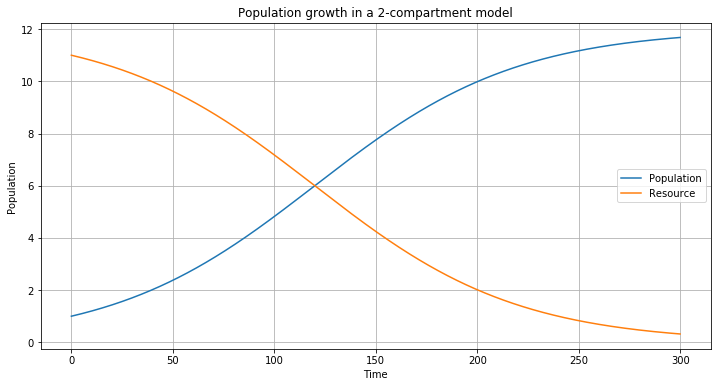

In [128]:
# Put your code here
import math

t  = np.arange(0.0, Tmax, 0.1)  
y0 = [P0, R0]
soln = odeint(derivs2, y0, t)

plt.figure(figsize=(12,6))
plt.plot(t, soln[:,0], label='Population')
plt.plot(t, soln[:,1], label='Resource')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population growth in a 2-compartment model')
plt.grid()
plt.legend(loc=0)

**Question 5:** Now, plot the sum $P+R$ as function of time. Describe your observation in the markdown cell below.


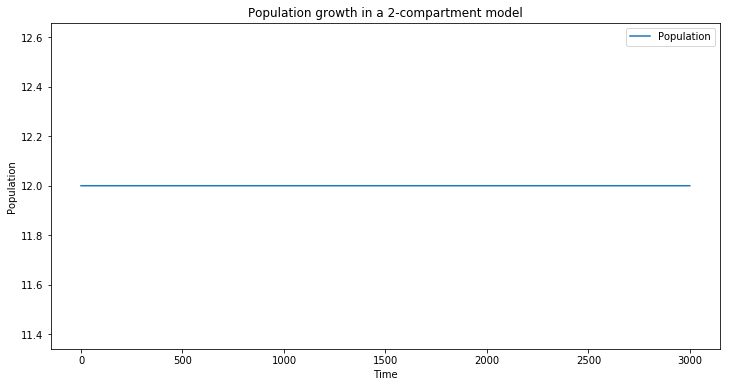

In [129]:
# Put your code here
plt.figure(figsize=(12,6))
plt.plot(soln[:,0]+soln[:,1], label='Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population growth in a 2-compartment model')
plt.legend(loc=0)

Put your answer here

## Part 2: Population growth in a 3-compartment model (25 points)

In this we section consider a 3-compartment model. The equations are provided, but you need to solve them, plot the results and consider different choices of parameters, as discussed in the questions below.

We now modify our model to make it more interesting. We add another compartment $W$ that corresponds to _knowledge_ or _innovation_. We assume that the aliens, as their civilization gets more advanced, can discover more unallocated resources. This is similar to what we observe here on Earth. For instance, once the humans acquired knowledge about metals, they effectively increased the amount of unallocated resources available, or when the properties of hydrocarbons became understood in the 19th century, it unlocked a vast amount of resources that we rely upon today.

The diagram for the model is shown below. It is more complicated and, as a result, involves more parameters.

<img src="https://i.imgur.com/o25IQqw.png" width=300px>


$q$, $a$ and $b$ are constants whose meaning is defined below. The relation between the population $P$ and the unallocated resources $R$ is similar to the previous model: $R$ is converted to $P$, but in this case the rate also involves the knowledge $W$. The knowledge $W$ adds a positive contribution to resources, and it is of the form:

$$
\frac{a}{q}\,\frac{W}{t+0.0001}.
$$

(The little positive constant $0.0001$ in the denominator is added to avoid division by 0 at $t=0$, but effectively this term behaves as $\frac{W}{t}$.) The dashed end of the arrow on the $W$ compartment represents the fact that while knowledge contributes to the resources, it does not decrease because of that.
We can interpret such term in the following way: more knowledge "unlocks" more resources. For instance, if we have technology that a car can run 10 miles per gallon of gas, and then we learn a new technology that it can run 30 miles per gallon - this is as if we tripled the amount of the available resource. The $\sim 1/t$ part means that although knowledge grows, it gets harder with time to keep adding to the resources.

The arrow entering the $W$ compartment means that in this model the knowledge keeps increasing at some constant rate $b$.

The first-order differential equations that correspond to the diagram above are:

\begin{eqnarray}
\frac{dP}{dt} &=& q\,\frac{PR}{1+W},\\
\frac{dR}{dt} &=& -q\,\frac{PR}{1+W}
                  +\frac{a}{q}\,
                   \frac{W}{t+0.0001},\\
\frac{dW}{dt} &=& b.
\end{eqnarray}

As before, the initial values of the population and resources at time $t=0$ be $P(t=0)=P_0$ and $R(t=0)=R_0$. For the knowledge we will always choose $W(t=0)=W_0=0$.
This time we define

$$
q=\frac{a+b}{c},
$$

where $a$ is a parameter similar to the simpler 2-compartment model in Part 1, $b$ controls the rate of acquiring knowledge and $c=P_0+R_0$.

Again $a$, $b$, $c$ and, as a result, $q$ are constants, while $P$, $R$ and $W$ are functions of time $t$. To get started we can use the values given below.


In [130]:
# model parameters
a = 0.02  # related to conversion of unallocated resources into population
b = 0.0   # related to growth of knowledge

# initial conditions
P0 = 1.0 # billions
R0 = 11.0 # billions
W0 = 0.0

# time period
Tmax = 600 # years -- NOTICE THAT WE OBSERVE THE SYSTEM FOR LONGER TIMES THAN PREVIOUSLY

c = P0+R0
r = a/(P0+R0)
q = (a+b)/c

**Question 6:** What do you expect in this model when $b=0$? (Keep in mind, we start with $W_0=0$.)

W (knowledge) will be a constant that will not increase

**Question 7:** Define a `derivs3` function that calculates and returns the values on the right hand side for the equations given above. The difference from **Question 3** though is that we provide a list of three values (current $P$, $R$ and $W$) and return a list of three values, $dP/dt$, $dR/dt$ and $dW/dt$.


In [131]:
# Put your code here
def derivs3(y, t):
    dPdt= q * ( (y[0]*y[1]) / (1+y[2]))
    dRdt= (-q * ((y[0]*y[1]) / (1+y[2])) )+( (a/q)*(y[2]/(t+0.0001)) )
    dWdt= b
    return dPdt, dRdt, dWdt

**Question 8:** With the initial conditions similar to the ones in **Question 4** use `odeint` to solve the equations and plot the results for $P$, $R$, $W$ and $P+R$. Compare to the results you obtained in **Question 4**.


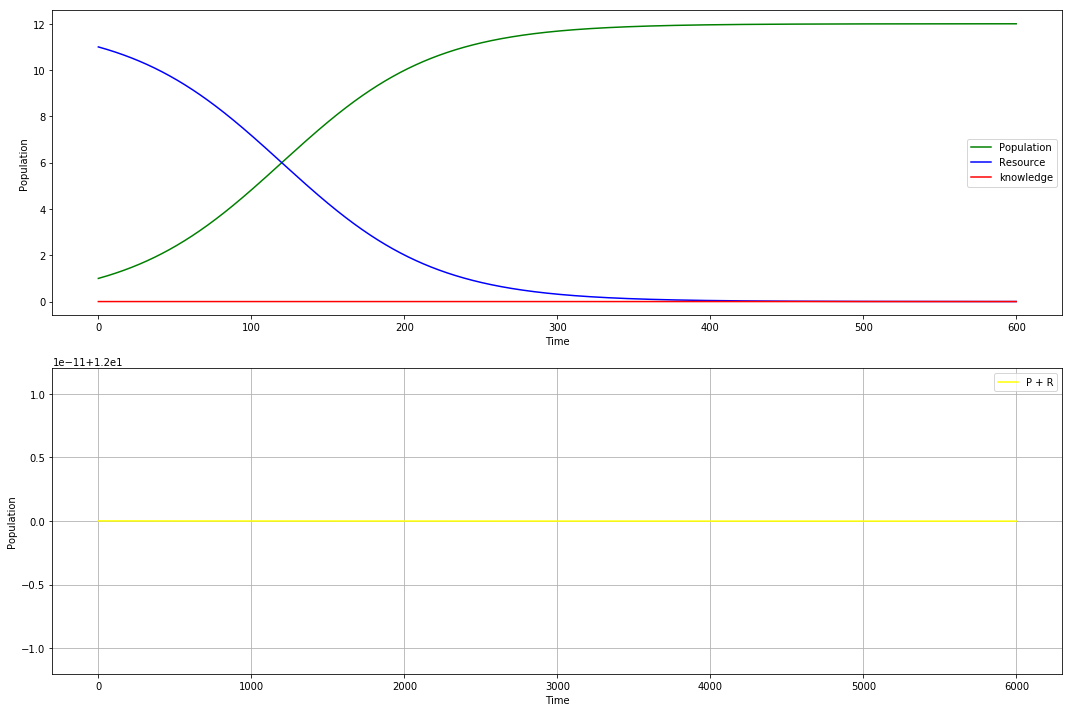

In [132]:
# Put your code here
t  = np.arange(0.0, Tmax, 0.1)  
y0 = [P0, R0, W0]
soln = odeint(derivs3, y0, t)

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,soln[:,0],  label="Population", color="green")
plt.plot(t,soln[:,1],  label="Resource", color="blue")
plt.plot(t, soln[:,2], label="knowledge", color="red")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.subplot(2,1,2)
plt.plot(soln[:,0]+soln[:,1], label="P + R", color="YELLOW")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Let us now change the parameters to the following:**

In [133]:
# model parameters
a = 0.02 # related to conversion of unallocated resources into population
b = 0.001 # related to growth of knowledge

# initial conditions
P0 = 1.0 # billions
R0 = 11.0 # billions
W0 = 0.0

# time period
Tmax = 600 # years

c = P0+R0
r = a/(P0+R0)
q = (a+b)/c

**Question 9:** Solve the equations, as you did in **Question 8** and plot the results. Do you observe any differences? Write your comments in the mark down cell below.


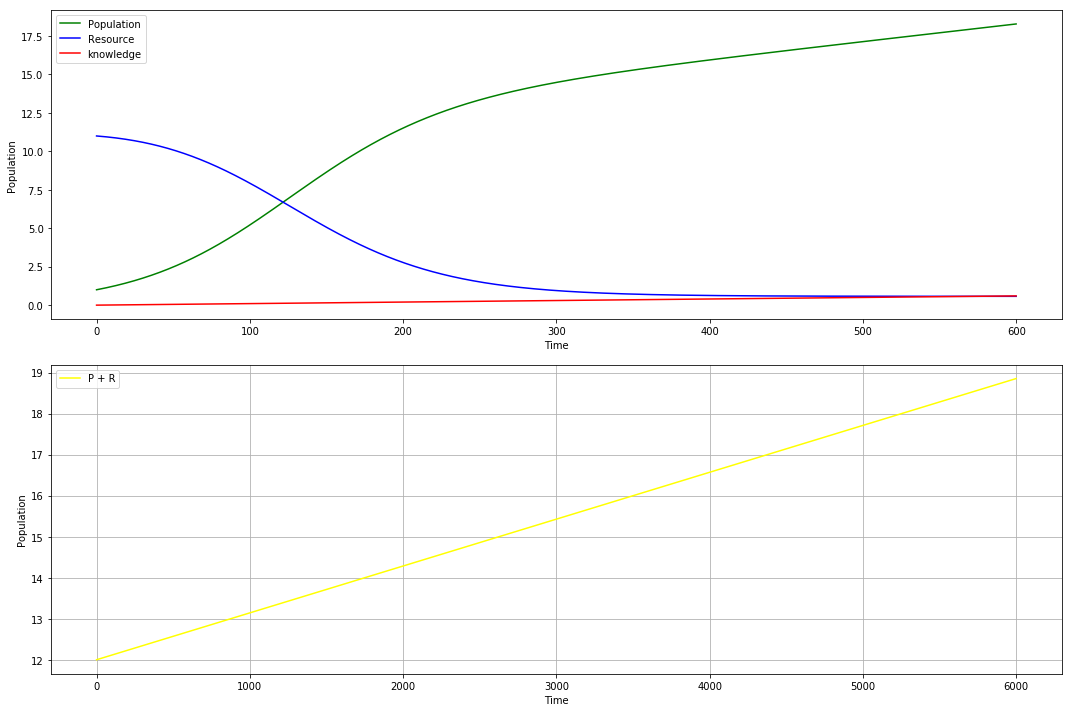

In [134]:
# Put your code here
t  = np.arange(0.0, Tmax, 0.1)  
y0 = [P0, R0, W0]
soln = odeint(derivs3, y0, t)

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,soln[:,0],  label="Population", color="green")
plt.plot(t,soln[:,1],  label="Resource", color="blue")
plt.plot(t, soln[:,2], label="knowledge", color="red")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.subplot(2,1,2)
plt.plot(soln[:,0]+soln[:,1], label="P + R", color="YELLOW")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

The w increased in the rate of b

**Question 10:** The aliens want to inhabit an empty planet with no resources. They have a finite amount of space in their ships, so they have two choices:

1. Take five billion aliens and one billion resources ($P_0=5$, $R_0=1$).
2. Take one billion aliens and five billion resources ($P_0=1$, $R_0=5$).

If their goal is to maximize the population after **200 years**, which option should they take? If they want to maximize the population after **600 years**, which option should they take?

Solve the equations for both scenarios and plot the population $P$ for both cases as function of time **on the same plot**.

Use the rest of the parameters as given below.

Make sure you record your responses to the questions in the mark down cell below!

In [135]:
# model parameters
a = 0.02   # related to conversion of unallocated resources into population
b = 0.0001   # related to growth of knowledge
W0 = 0.0     # initial amount of knowledge

# time period
Tmax = 600 # years

c = P0+R0
q = (a+b)/c

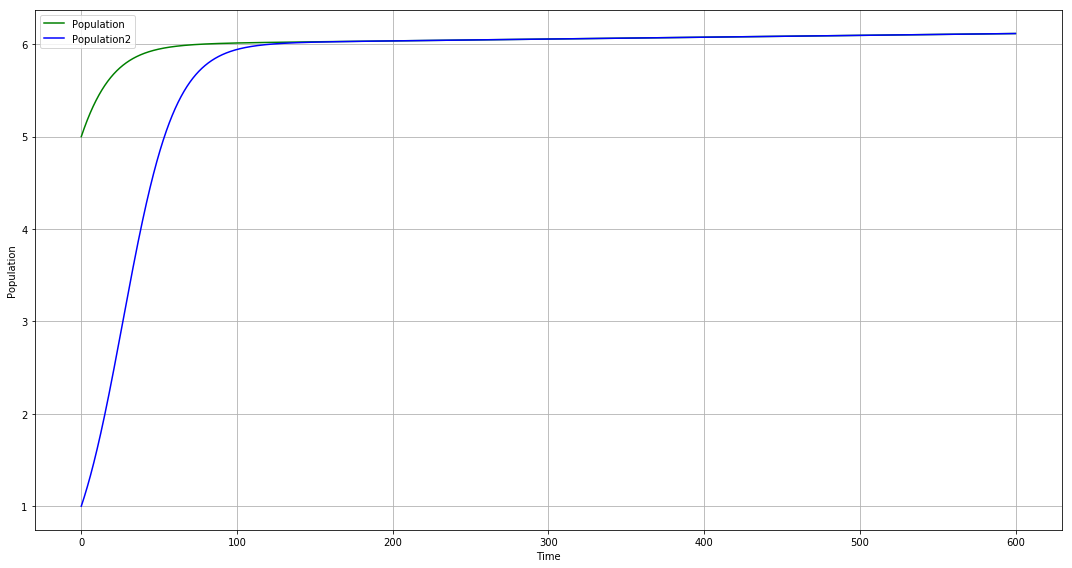

In [124]:
# Put your code here
t  = np.arange(0.0, Tmax, 0.1) 
c = 5+1
r = a/(5+1)
soln = odeint(derivs3, [5, 1, W0], t)
r = a/(1+5)
c = 1+5
soln2 = odeint(derivs3, [1, 5, W0], t)

plt.figure(figsize=(15,8))
plt.plot(t,soln[:,0],  label="Population", color="green")
plt.plot(t,soln2[:,0],  label="Population2", color="blue")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

They should have P=1 and R=5

**Question 11:** The aliens want to inhabit another planet with no resources. They can afford to send one billion aliens with one billion resources ($P_0=1$ and $R_0=1$). This time they can equip their space explorers differently, they have two options:

1. Provide the tools and equipment that correspond to the rates: $a=0.03$ and $b=0.0005$. Recall that $a$ controls how fast we convert the unallocated resources into population and $b$ controls the rate of growth of knowledge.
2. Take less equipment, so $a$ would drop by an order of magnitude, but take more tools that would increase $b$ by an order of magnitude, i.e. $a=0.003$ and $b=0.005$.

If their goal is to maximize the population after **200 years**, which option should they take? If they want to maximize the population after **600 years**, which option should they take.

Solve the equations for both scenarios and plot the population $P$ for both cases as function of time **on the same plot**.

Use the rest of the parameters as given below.

Make sure you record your responses to the questions in the mark down cell below!

In [136]:
# initial conditions
P0 = 1.0 # billions
R0 = 1.0 # billions
W0 = 0.0

# time period
Tmax = 600 # years

c = P0+R0

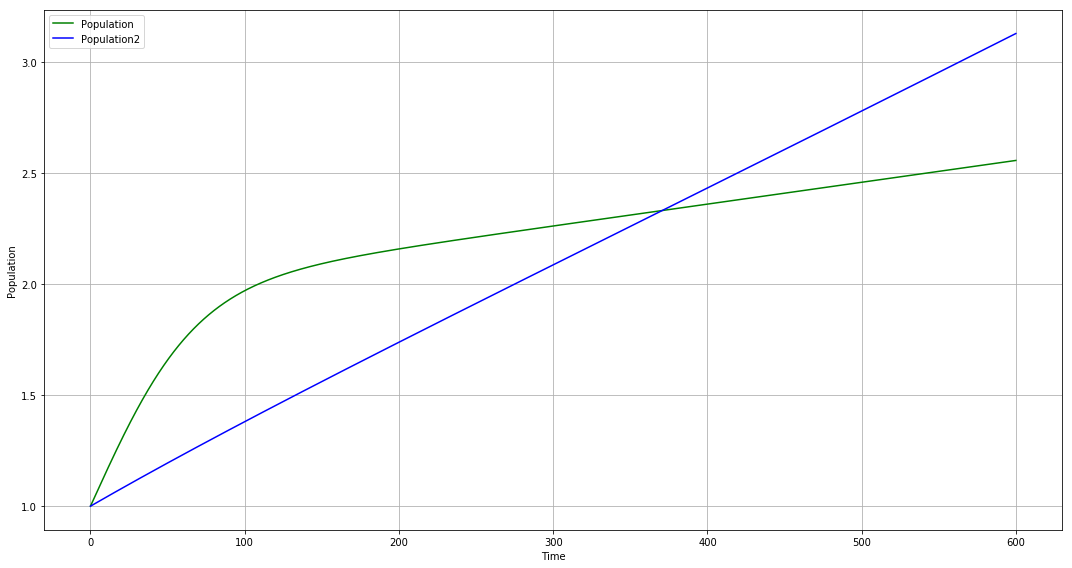

In [137]:
# Put your code here
t  = np.arange(0.0, Tmax, 0.1) 
y = [P0, R0, W0]
a=0.03
b=0.0005
q = (a+b)/c
r = a/(P0+R0)
soln = odeint(derivs3, y, t)
a=0.003
b=0.005
q = (a+b)/c
r = a/(P0+R0)
soln2 = odeint(derivs3, y, t)

plt.figure(figsize=(15,8))
plt.plot(t,soln[:,0],  label="Population", color="green")
plt.plot(t,soln2[:,0],  label="Population2", color="blue")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

They should have a=0.03 and b=0.0005

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [122]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/b9h96LqrSWNS4eMm1" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload it there.